In [1117]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn import linear_model, datasets, tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn import metrics


### Read CSV file

In [1118]:
# read csv 
df = pd.read_csv("Speed Dating Data.csv", encoding="ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


### Preprocessing

In [1119]:
#show all rows
#pd.options.display.max_rows = None

In [1120]:
# number or rows and columns
df.shape

(8378, 195)

In [1121]:
## check for duplicates
df[df.duplicated()].count()

iid         0
id          0
gender      0
idg         0
condtn      0
wave        0
round       0
position    0
positin1    0
order       0
partner     0
pid         0
match       0
int_corr    0
samerace    0
age_o       0
race_o      0
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
dec_o       0
attr_o      0
sinc_o      0
intel_o     0
fun_o       0
amb_o       0
shar_o      0
like_o      0
prob_o      0
met_o       0
age         0
field       0
field_cd    0
undergra    0
mn_sat      0
tuition     0
race        0
imprace     0
imprelig    0
from        0
zipcode     0
income      0
goal        0
date        0
go_out      0
career      0
career_c    0
sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
exphappy    0
expnum      0
attr1_1     0
sinc1_1     0
intel1

In [1122]:
#check for column data types
df.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
position      int64
positin1    float64
order         int64
partner       int64
pid         float64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
amb_o       float64
shar_o      float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field        object
field_cd    float64
undergra     object
mn_sat       object
tuition      object
race        float64
imprace     float64
imprelig    float64
from         object
zipcode      object
income       object
goal        float64
date        float64
go_out      float64
career       object
career_c    float64


In [1123]:
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [1138]:
dff = df.copy()
#count NAN
s = df.isnull().sum(axis = 0)

In [1139]:
# loop to deleted columns with nulls 500 and greater
for col in dff: 
   if s[col] >= 500:  
       del dff[col]
del dff['field']
del dff['career']
del dff['from']
del dff['idg']
del dff['pid']
del dff['iid']
del dff['id']

In [1140]:
dff.shape

(8378, 78)

In [1127]:
# for feature in dff.columns: 
#     if dff[feature].dtype == 'object': 
#         dff[feature] = pd.Categorical(dff[feature])
# dff.head(10)

In [1128]:
#oneHotCols=["from"]

In [1129]:
#as_Selected=pd.get_dummies(dff,oneHotCols)


In [1141]:
dff.head()

,gender,condtn,wave,round,position,order,partner,match,int_corr,samerace,...,intel3_1,amb3_1,dec,attr,sinc,intel,fun,like,prob,met
0,0,1,1,10,7,4,1,0,0.14,0,...,8.0,7.0,1,6.0,9.0,7.0,7.0,7.0,6.0,2.0
1,0,1,1,10,7,3,2,0,0.54,0,...,8.0,7.0,1,7.0,8.0,7.0,8.0,7.0,5.0,1.0
2,0,1,1,10,7,10,3,1,0.16,1,...,8.0,7.0,1,5.0,8.0,9.0,8.0,7.0,NaN,1.0
3,0,1,1,10,7,5,4,1,0.61,0,...,8.0,7.0,1,7.0,6.0,8.0,7.0,7.0,6.0,2.0
4,0,1,1,10,7,7,5,1,0.21,0,...,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,2.0


In [1142]:
dff.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,8378.0,0.500597,0.500029,0.00,0.00,1.00,1.00,1.00
condtn,8378.0,1.828837,0.376673,1.00,2.00,2.00,2.00,2.00
wave,8378.0,11.350919,5.995903,1.00,7.00,11.00,15.00,21.00
round,8378.0,16.872046,4.358458,5.00,14.00,18.00,20.00,22.00
position,8378.0,9.042731,5.514939,1.00,4.00,8.00,13.00,22.00
order,8378.0,8.927668,5.477009,1.00,4.00,8.00,13.00,22.00
partner,8378.0,8.963595,5.491068,1.00,4.00,8.00,13.00,22.00
match,8378.0,0.164717,0.370947,0.00,0.00,0.00,0.00,1.00
int_corr,8220.0,0.196010,0.303539,-0.83,-0.02,0.21,0.43,0.91
samerace,8378.0,0.395799,0.489051,0.00,0.00,0.00,1.00,1.00


In [1143]:
dff.dtypes

gender        int64
condtn        int64
wave          int64
round         int64
position      int64
order         int64
partner       int64
match         int64
int_corr    float64
samerace      int64
age_o       float64
race_o      float64
pf_o_att    float64
pf_o_sin    float64
pf_o_int    float64
pf_o_fun    float64
pf_o_amb    float64
pf_o_sha    float64
dec_o         int64
attr_o      float64
sinc_o      float64
intel_o     float64
fun_o       float64
like_o      float64
prob_o      float64
met_o       float64
age         float64
field_cd    float64
race        float64
imprace     float64
imprelig    float64
goal        float64
date        float64
go_out      float64
career_c    float64
sports      float64
tvsports    float64
exercise    float64
dining      float64
museums     float64
art         float64
hiking      float64
gaming      float64
clubbing    float64
reading     float64
tv          float64
theater     float64
movies      float64
concerts    float64
music       float64


In [1144]:
corr_matrix = dff.corr().abs()
print(corr_matrix)

            gender    condtn      wave     round  position     order  \
gender    1.000000  0.002627  0.001264  0.020630  0.001091  0.006685   
condtn    0.002627  1.000000  0.219627  0.816316  0.329120  0.324108   
wave      0.001264  0.219627  1.000000  0.237234  0.083091  0.092955   
round     0.020630  0.816316  0.237234  1.000000  0.385781  0.399942   
position  0.001091  0.329120  0.083091  0.385781  1.000000  0.155179   
order     0.006685  0.324108  0.092955  0.399942  0.155179  1.000000   
partner   0.010160  0.318172  0.091667  0.391140  0.167704  0.157973   
match     0.000530  0.045960  0.017404  0.033257  0.010210  0.038731   
int_corr  0.000954  0.043934  0.047787  0.016563  0.003317  0.020551   
samerace  0.000966  0.069711  0.014967  0.034067  0.030907  0.008640   
age_o     0.072408  0.088332  0.093570  0.000174  0.004301  0.003246   
race_o    0.019315  0.093495  0.068064  0.066630  0.091352  0.025676   
pf_o_att  0.351600  0.051071  0.077485  0.011143  0.035852  0.00

In [1145]:
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_Select = [column for column in upper.columns if any(upper[column] >= 0.1)]

In [1146]:
# print(to_Select)

In [1147]:
# columns to list
data = dff.columns.tolist()

### Initial Prep for the Training Model

In [1148]:
# Initial Data Selected for Sample and Traing run
as_Selected =dff[data]
print(as_Selected.columns)
print("<------------------------->")
print(as_Selected.shape)

Index(['gender', 'condtn', 'wave', 'round', 'position', 'order', 'partner',
       'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att',
       'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o',
       'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o', 'prob_o', 'met_o',
       'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date',
       'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1',
       'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1',
       'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec',
       'attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met'],
      dtype='object')
<------------------------->
(8378, 78)


In [1149]:
as_Selected.head()

,gender,condtn,wave,round,position,order,partner,match,int_corr,samerace,...,intel3_1,amb3_1,dec,attr,sinc,intel,fun,like,prob,met
0,0,1,1,10,7,4,1,0,0.14,0,...,8.0,7.0,1,6.0,9.0,7.0,7.0,7.0,6.0,2.0
1,0,1,1,10,7,3,2,0,0.54,0,...,8.0,7.0,1,7.0,8.0,7.0,8.0,7.0,5.0,1.0
2,0,1,1,10,7,10,3,1,0.16,1,...,8.0,7.0,1,5.0,8.0,9.0,8.0,7.0,NaN,1.0
3,0,1,1,10,7,5,4,1,0.61,0,...,8.0,7.0,1,7.0,6.0,8.0,7.0,7.0,6.0,2.0
4,0,1,1,10,7,7,5,1,0.21,0,...,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,2.0


### Final attributes selected for the Model

In [1136]:
#Final Train Code Attribute Model 
as_Selected = dff[['dec','match','like','dec_o','attr1_1','attr2_1','sinc','prob','attr']]

In [1137]:
as_Selected = dff[['dec','match','like','dec_o','attr','fun','attr_o','prob','sinc','intel']]

### Select fields use to to determine Decision

In [1150]:
as_Selected.columns.tolist()

['gender',
 'condtn',
 'wave',
 'round',
 'position',
 'order',
 'partner',
 'match',
 'int_corr',
 'samerace',
 'age_o',
 'race_o',
 'pf_o_att',
 'pf_o_sin',
 'pf_o_int',
 'pf_o_fun',
 'pf_o_amb',
 'pf_o_sha',
 'dec_o',
 'attr_o',
 'sinc_o',
 'intel_o',
 'fun_o',
 'like_o',
 'prob_o',
 'met_o',
 'age',
 'field_cd',
 'race',
 'imprace',
 'imprelig',
 'goal',
 'date',
 'go_out',
 'career_c',
 'sports',
 'tvsports',
 'exercise',
 'dining',
 'museums',
 'art',
 'hiking',
 'gaming',
 'clubbing',
 'reading',
 'tv',
 'theater',
 'movies',
 'concerts',
 'music',
 'shopping',
 'yoga',
 'exphappy',
 'attr1_1',
 'sinc1_1',
 'intel1_1',
 'fun1_1',
 'amb1_1',
 'shar1_1',
 'attr2_1',
 'sinc2_1',
 'intel2_1',
 'fun2_1',
 'amb2_1',
 'shar2_1',
 'attr3_1',
 'sinc3_1',
 'fun3_1',
 'intel3_1',
 'amb3_1',
 'dec',
 'attr',
 'sinc',
 'intel',
 'fun',
 'like',
 'prob',
 'met']

In [1151]:
as_Selected.isnull().sum(axis = 0).sort_values(ascending=False)

met_o       385
met         375
fun_o       360
fun         350
prob_o      318
prob        309
intel_o     306
intel       296
sinc_o      287
sinc        277
like_o      250
like        240
attr_o      212
attr        202
int_corr    158
career_c    138
pf_o_sha    129
shar1_1     121
pf_o_amb    107
attr3_1     105
sinc3_1     105
amb3_1      105
intel3_1    105
fun3_1      105
age_o       104
exphappy    101
amb1_1       99
pf_o_fun     98
date         97
age          95
pf_o_att     89
pf_o_sin     89
shar2_1      89
amb2_1       89
pf_o_int     89
fun1_1       89
field_cd     82
imprace      79
imprelig     79
goal         79
sports       79
go_out       79
dining       79
tvsports     79
concerts     79
fun2_1       79
intel2_1     79
sinc2_1      79
attr2_1      79
intel1_1     79
sinc1_1      79
exercise     79
yoga         79
shopping     79
music        79
attr1_1      79
movies       79
gaming       79
theater      79
art          79
hiking       79
museums      79
clubbing

### Fill in null values with Mean or Median

In [1152]:
for col in as_Selected.columns:
    as_Selected[col].fillna(as_Selected[col].median(), inplace=True)

In [1153]:
as_Selected.shape

(8378, 78)

In [1154]:
as_Selected.describe()

,gender,condtn,wave,round,position,order,partner,match,int_corr,samerace,...,intel3_1,amb3_1,dec,attr,sinc,intel,fun,like,prob,met
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,...,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,0.500597,1.828837,11.350919,16.872046,9.042731,8.927668,8.963595,0.164717,0.196274,0.395799,...,8.398902,7.583672,0.419909,6.185414,7.169372,7.355574,6.425639,6.130246,5.199869,0.906302
std,0.500029,0.376673,5.995903,4.358458,5.514939,5.477009,5.491068,0.370947,0.300669,0.489051,...,1.070783,1.767758,0.493573,1.926733,1.711587,1.524334,1.916210,1.814855,2.090285,0.987171
min,0.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,...,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,0.000000,-0.010000,0.000000,...,8.000000,7.000000,0.000000,5.000000,6.000000,7.000000,5.000000,5.000000,4.000000,0.000000
50%,1.000000,2.000000,11.000000,18.000000,8.000000,8.000000,8.000000,0.000000,0.210000,0.000000,...,8.000000,8.000000,0.000000,6.000000,7.000000,7.000000,7.000000,6.000000,5.000000,0.000000
75%,1.000000,2.000000,15.000000,20.000000,13.000000,13.000000,13.000000,0.000000,0.430000,1.000000,...,9.000000,9.000000,1.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,2.000000
max,1.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,1.000000,0.910000,1.000000,...,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000


In [1155]:
as_Selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 78 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    8378 non-null   int64  
 1   condtn    8378 non-null   int64  
 2   wave      8378 non-null   int64  
 3   round     8378 non-null   int64  
 4   position  8378 non-null   int64  
 5   order     8378 non-null   int64  
 6   partner   8378 non-null   int64  
 7   match     8378 non-null   int64  
 8   int_corr  8378 non-null   float64
 9   samerace  8378 non-null   int64  
 10  age_o     8378 non-null   float64
 11  race_o    8378 non-null   float64
 12  pf_o_att  8378 non-null   float64
 13  pf_o_sin  8378 non-null   float64
 14  pf_o_int  8378 non-null   float64
 15  pf_o_fun  8378 non-null   float64
 16  pf_o_amb  8378 non-null   float64
 17  pf_o_sha  8378 non-null   float64
 18  dec_o     8378 non-null   int64  
 19  attr_o    8378 non-null   float64
 20  sinc_o    8378 non-null   floa

In [1088]:
# for column in as_Selected.select_dtypes(include='object'):
#     print(rename_df[column].value_counts())
#     print()

In [1089]:
# sns.pairplot(as_Selected,diag_kind='kde')

In [1090]:
# plt.figure(figsize=(25,25))
# sns.heatmap(as_Selected.corr(),annot=True,fmt='.2f',cmap='rainbow', )
# plt.show()

In [1156]:
# Missing values need to be replaced
pd.DataFrame(as_Selected.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
gender,0
condtn,0
wave,0
round,0
position,0
order,0
partner,0
match,0
int_corr,0
samerace,0


In [1157]:
#new_df = rename_df.copy()
#df = new_df.dropna()
df = as_Selected.copy()
#pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

### Split Data

In [1158]:
X = df.drop("dec" , axis=1)
y = df.pop("dec")

In [1159]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Build Decision Tree Model

In [1095]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=42)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Scoring our Decision Tree

In [1096]:
print("Accuracy on training set : ",dTree.score(X_train, y_train))
print("Accuracy on test set : ",dTree.score(X_test, y_test))

Accuracy on training set :  1.0
Accuracy on test set :  0.8400954653937948


In [1097]:
#Checking number of positives
y.sum(axis = 0)

3518

In [1098]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    print(cm)
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [1099]:
##  Function to calculate recall score
def get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

### Confusion Matrix

[[1028  159]
 [ 176  732]]


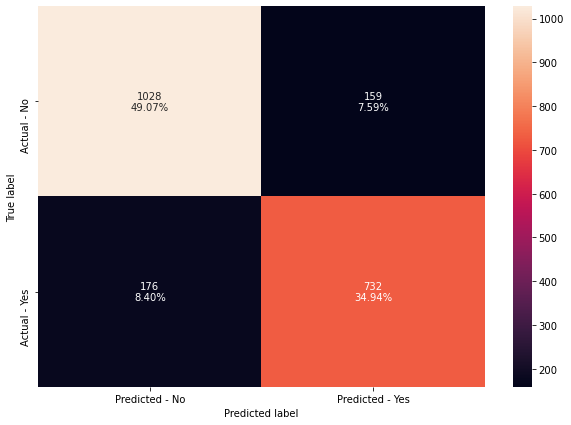

In [1100]:
make_confusion_matrix(dTree,y_test)

In [1101]:
# Recall on train and test
get_recall_score(dTree)

Recall on training set :  1.0
Recall on test set :  0.8061674008810573


### Visualizing the Decision Tree

In [1102]:


features = list(X.columns)
print(features)

['gender', 'condtn', 'wave', 'round', 'position', 'order', 'partner', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr', 'sinc', 'intel', 'fun', 'like', 'prob', 'met']


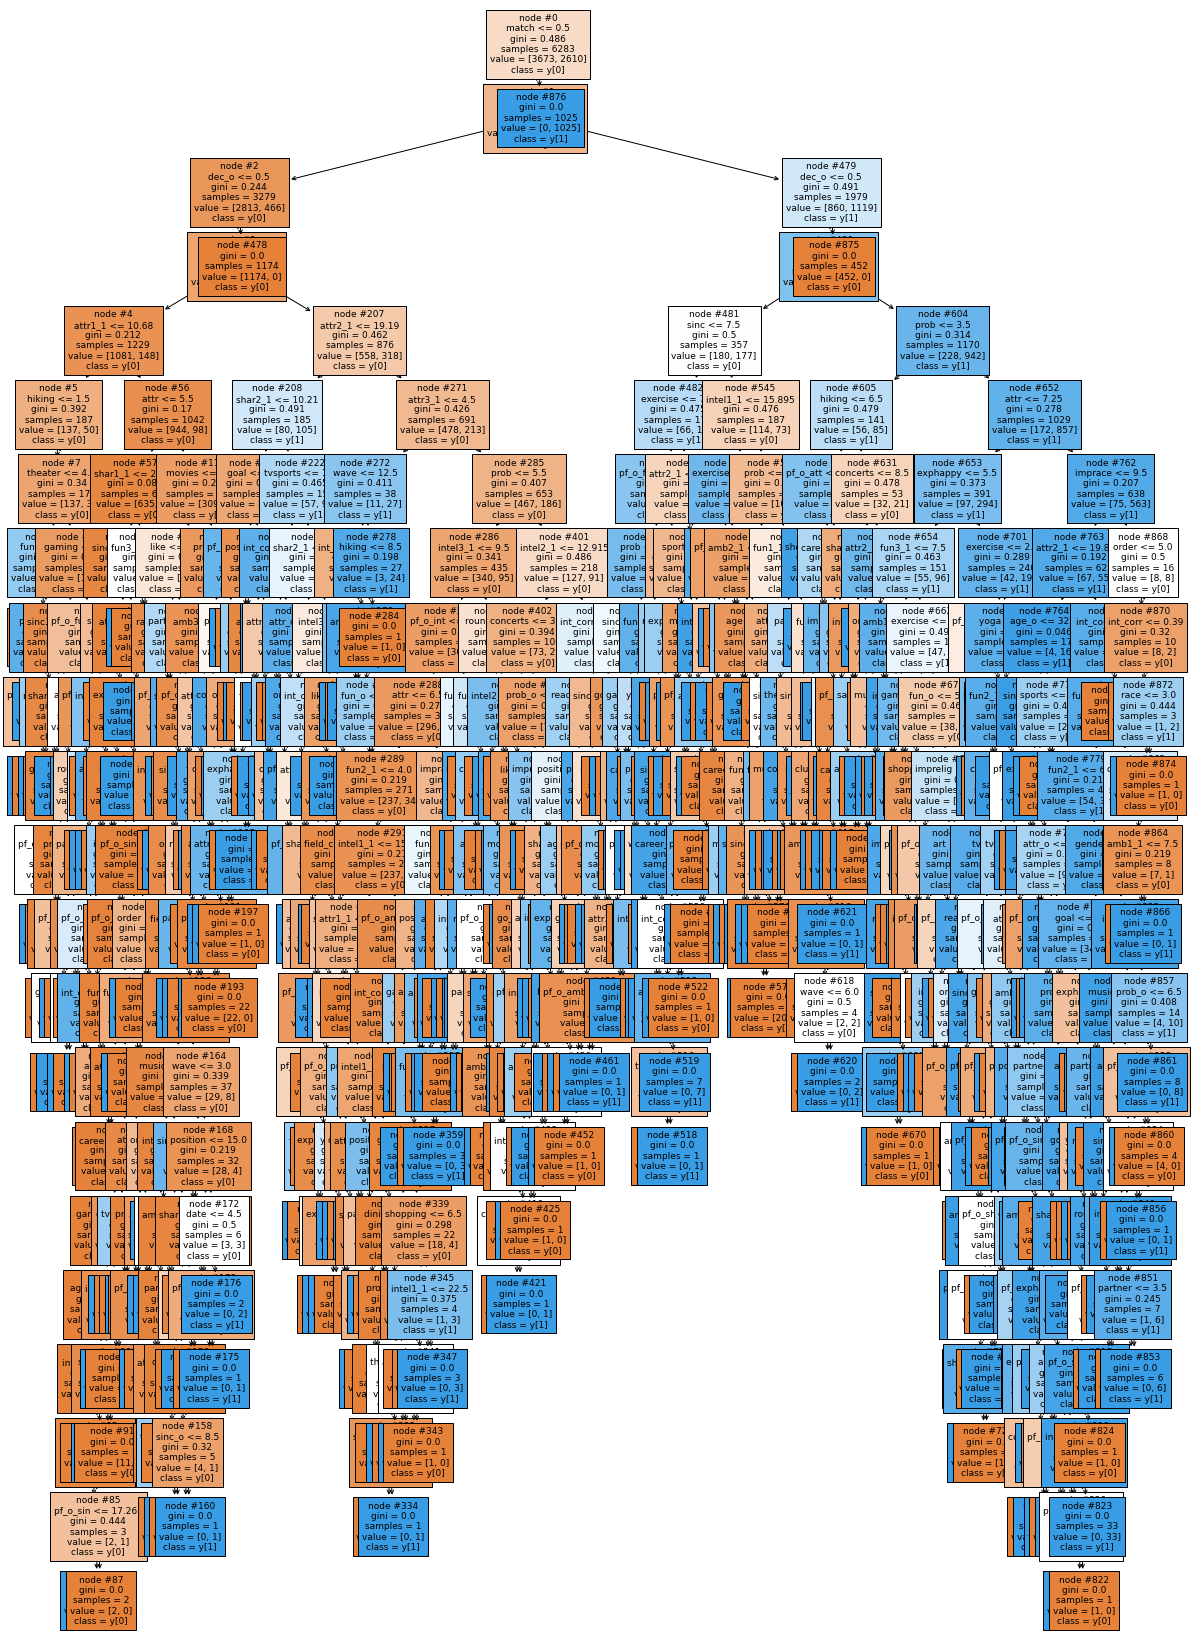

In [1103]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1104]:
# Text report showing the rules of a decision tree
print(tree.export_text(dTree,feature_names=features,show_weights=True))

|--- match <= 0.50
|   |--- like <= 6.25
|   |   |--- dec_o <= 0.50
|   |   |   |--- like <= 5.75
|   |   |   |   |--- attr1_1 <= 10.68
|   |   |   |   |   |--- hiking <= 1.50
|   |   |   |   |   |   |--- weights: [0.00, 12.00] class: 1
|   |   |   |   |   |--- hiking >  1.50
|   |   |   |   |   |   |--- theater <= 4.50
|   |   |   |   |   |   |   |--- fun <= 3.00
|   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- fun >  3.00
|   |   |   |   |   |   |   |   |--- prob <= 2.50
|   |   |   |   |   |   |   |   |   |--- pf_o_sha <= 5.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- pf_o_sha >  5.00
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |--- prob >  2.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 10.00] class: 1
|   |   |   |   |   |   |--- theater >  4.50
|   |   |   |   |   |   |   |--- g

In [1105]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

               Imp
match     0.274337
like      0.168790
dec_o     0.146957
attr      0.027878
prob      0.015752
attr2_1   0.014447
order     0.013833
int_corr  0.013386
partner   0.013148
pf_o_fun  0.010923
shar2_1   0.009285
exphappy  0.008889
fun_o     0.008377
intel1_1  0.008253
exercise  0.008232
like_o    0.007802
age_o     0.007776
pf_o_sin  0.007758
hiking    0.007718
attr1_1   0.007507
pf_o_amb  0.007494
fun       0.007387
fun2_1    0.007118
prob_o    0.006793
concerts  0.006560
gaming    0.006508
yoga      0.006272
attr_o    0.006258
sports    0.006151
attr3_1   0.005980
intel3_1  0.005655
round     0.005430
pf_o_int  0.005403
fun3_1    0.005350
theater   0.005259
sinc_o    0.005226
fun1_1    0.005041
imprace   0.004977
sinc      0.004864
amb3_1    0.004599
go_out    0.004595
wave      0.004523
intel_o   0.004449
position  0.004317
goal      0.004307
pf_o_att  0.004258
amb1_1    0.004236
tvsports  0.004108
intel2_1  0.004100
movies    0.004064
race_o    0.003704
sinc1_1   0.

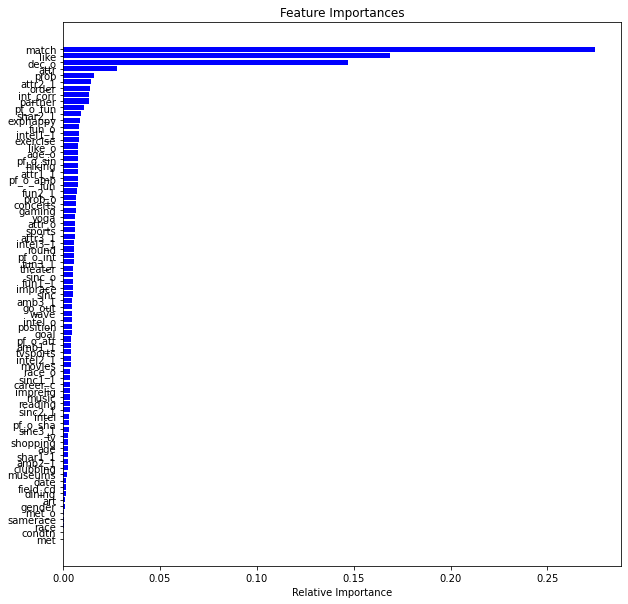

In [1106]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

##### According to the chart Attractive is the most important

### Reducing over fitting

In [1110]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=6,random_state=42)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Confusion Matrix - decision tree with depth

[[1035  152]
 [ 160  748]]


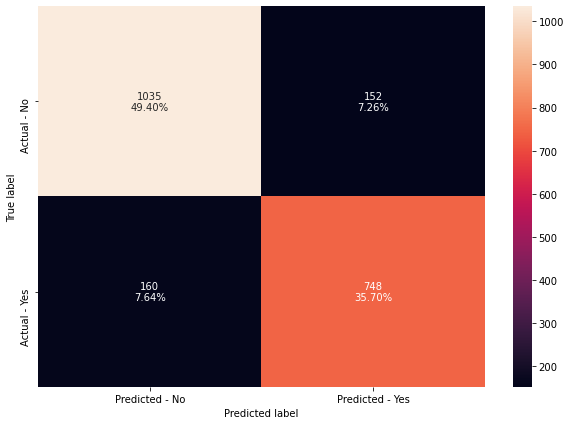

In [1111]:
make_confusion_matrix(dTree1, y_test)

In [1112]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
get_recall_score(dTree1)

Accuracy on training set :  0.8713990132102499
Accuracy on test set :  0.8510739856801909
Recall on training set :  0.8337164750957854
Recall on test set :  0.8237885462555066


##### Accuracy for Training and Test are closer so accurracy is better

### Visualizing the Decision Tree

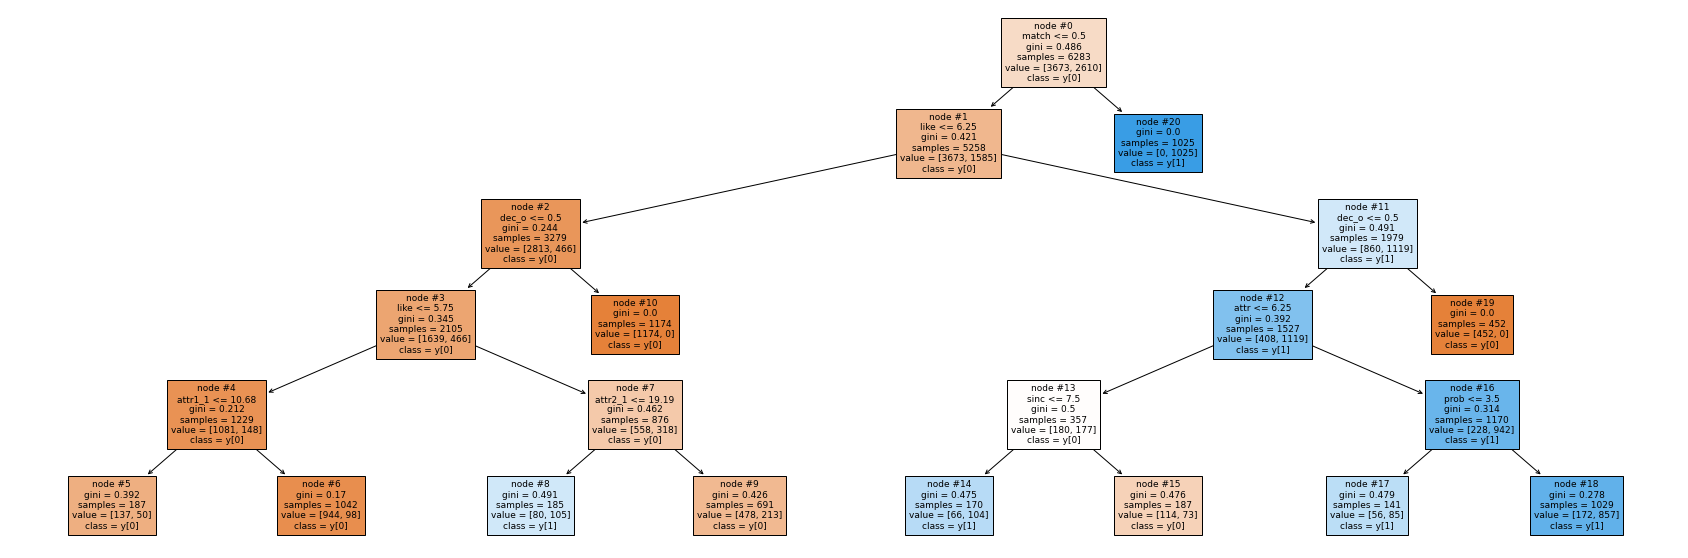

In [1113]:
plt.figure(figsize=(30,10))

tree.plot_tree(dTree1,feature_names=features,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [1114]:
# Text report showing the rules of a decision tree -
print(tree.export_text(dTree1,feature_names=features,show_weights=True))

|--- match <= 0.50
|   |--- like <= 6.25
|   |   |--- dec_o <= 0.50
|   |   |   |--- like <= 5.75
|   |   |   |   |--- attr1_1 <= 10.68
|   |   |   |   |   |--- weights: [137.00, 50.00] class: 0
|   |   |   |   |--- attr1_1 >  10.68
|   |   |   |   |   |--- weights: [944.00, 98.00] class: 0
|   |   |   |--- like >  5.75
|   |   |   |   |--- attr2_1 <= 19.19
|   |   |   |   |   |--- weights: [80.00, 105.00] class: 1
|   |   |   |   |--- attr2_1 >  19.19
|   |   |   |   |   |--- weights: [478.00, 213.00] class: 0
|   |   |--- dec_o >  0.50
|   |   |   |--- weights: [1174.00, 0.00] class: 0
|   |--- like >  6.25
|   |   |--- dec_o <= 0.50
|   |   |   |--- attr <= 6.25
|   |   |   |   |--- sinc <= 7.50
|   |   |   |   |   |--- weights: [66.00, 104.00] class: 1
|   |   |   |   |--- sinc >  7.50
|   |   |   |   |   |--- weights: [114.00, 73.00] class: 0
|   |   |   |--- attr >  6.25
|   |   |   |   |--- prob <= 3.50
|   |   |   |   |   |--- weights: [56.00, 85.00] class: 1
|   |   |   |   |-

In [1038]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

              Imp
match    0.442596
like     0.265674
dec_o    0.237090
attr     0.027675
attr2_1  0.010376
prob     0.006937
attr1_1  0.005037
sinc     0.004615


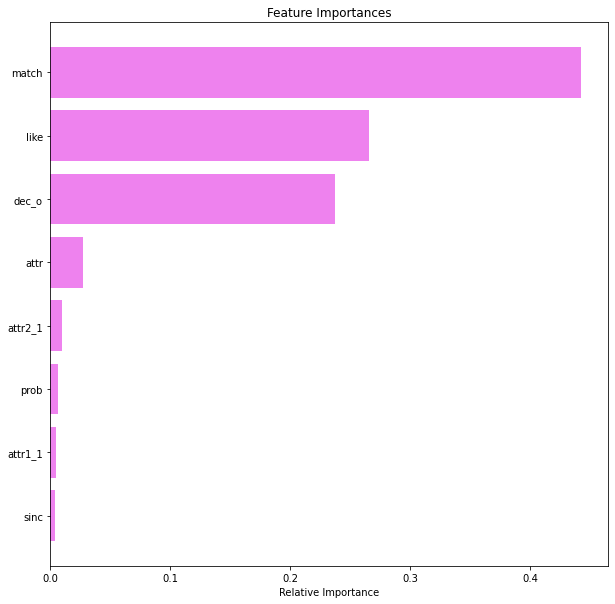

In [1039]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [1040]:
# DECISION TREE
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
decisionTree_model= 'decisionTree_model'
joblib.dump( dTree1, decisionTree_model)

['decisionTree_model']

In [1041]:
joblib.load(decisionTree_model, mmap_mode=None)

DecisionTreeClassifier(max_depth=5, random_state=42)

### Using GridSearch for Hyperparameter tuning of our tree model

In [1165]:
from sklearn.model_selection import GridSearchCV

In [1166]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_impurity_decrease=0.001,
                       random_state=42)

[[1058  129]
 [ 165  743]]


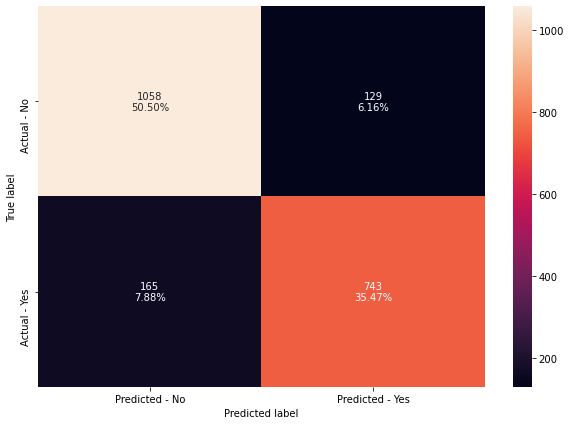

In [1169]:
make_confusion_matrix(estimator,y_test)

In [1170]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
get_recall_score(estimator)

Accuracy on training set :  0.8857233805506923
Accuracy on test set :  0.8596658711217183
Recall on training set :  0.8436781609195402
Recall on test set :  0.8182819383259912


In [1171]:
# # run when null values are fixed
# y=df['Decision']
# X=df[features]

# # Create decision tree classifer object
# clf = tree.DecisionTreeClassifier()
# # Train model
# model = clf.fit(X,y)

In [ ]:
# # run when null values are fixed
# from IPython.display import Image  
# from six import StringIO
# from sklearn.tree import export_graphviz
# import pydot
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [ ]:
# # Create DOT data
# dot_data = StringIO()
# tree.export_graphviz(model, out_file = dot_data,feature_names = features)
# # Draw graph
# #graph =  pydot.graph_from_dot_data(dot_data.getvalue())
# (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())

# print(graph)

In [ ]:
# # Show graph
# Image(graph.create_png())